In [60]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc


In [61]:
# dataset
df = pd.read_csv("./data/BTC-Daily.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [62]:
df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [63]:
# Range of dates covered
df["date"] = pd.to_datetime(df["date"])
date_range = str(df["date"].dt.date.min()) + " to " + str(df["date"].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


In [64]:
df["date"]

0      2022-03-01
1      2022-02-28
2      2022-02-27
3      2022-02-26
4      2022-02-25
          ...    
2646   2014-12-02
2647   2014-12-01
2648   2014-11-30
2649   2014-11-29
2650   2014-11-28
Name: date, Length: 2651, dtype: datetime64[ns]

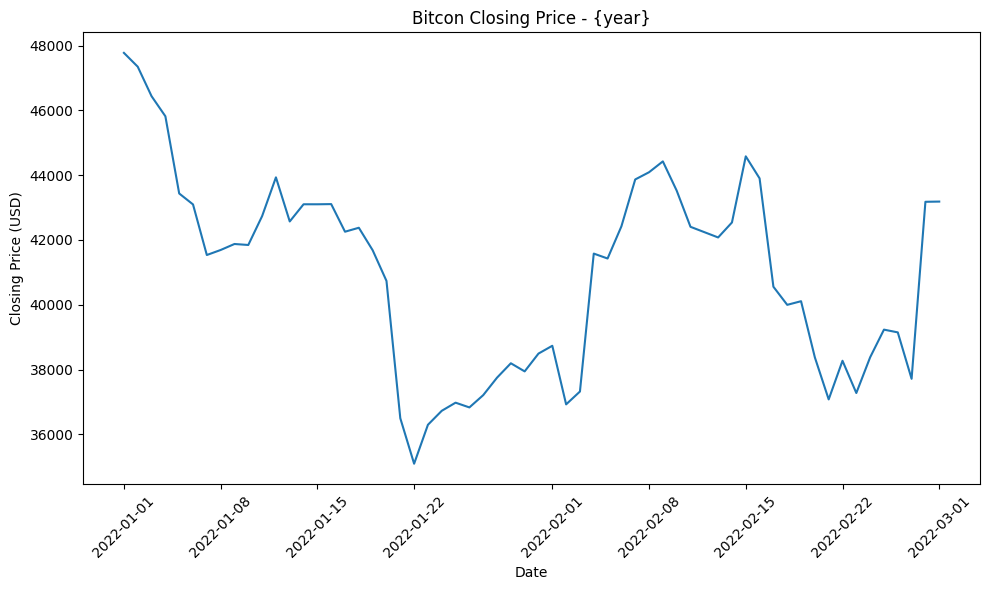

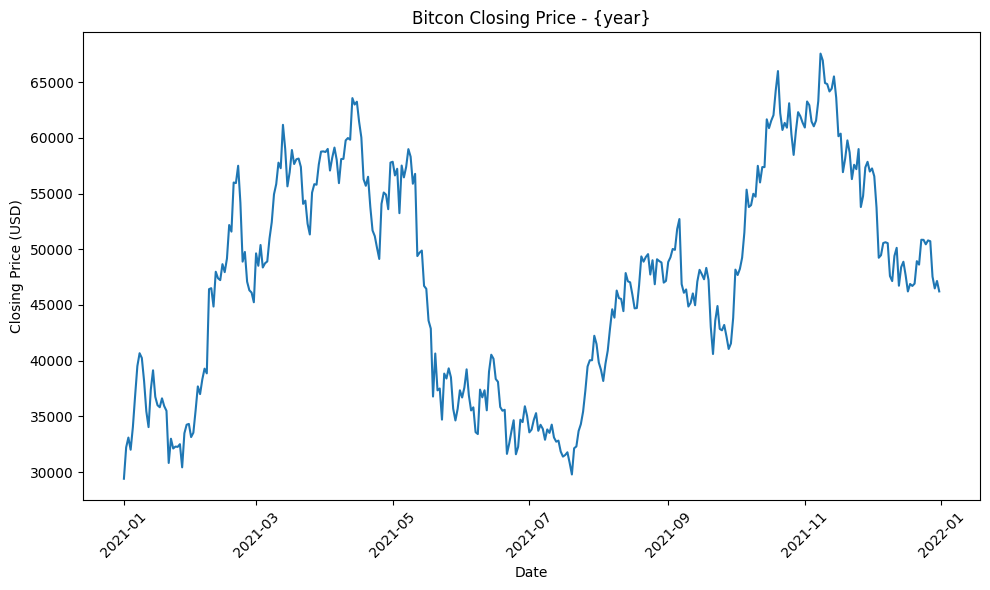

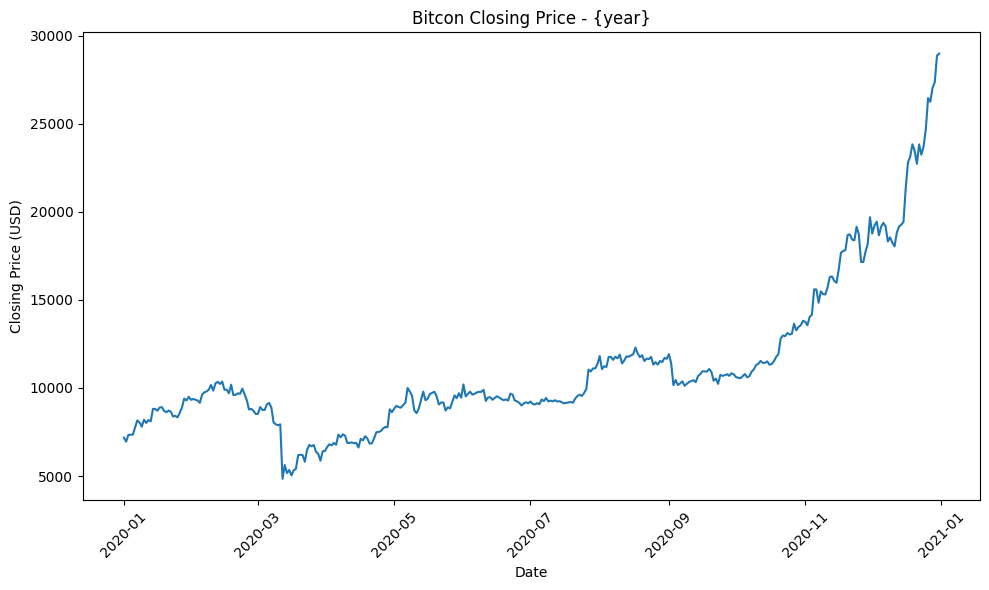

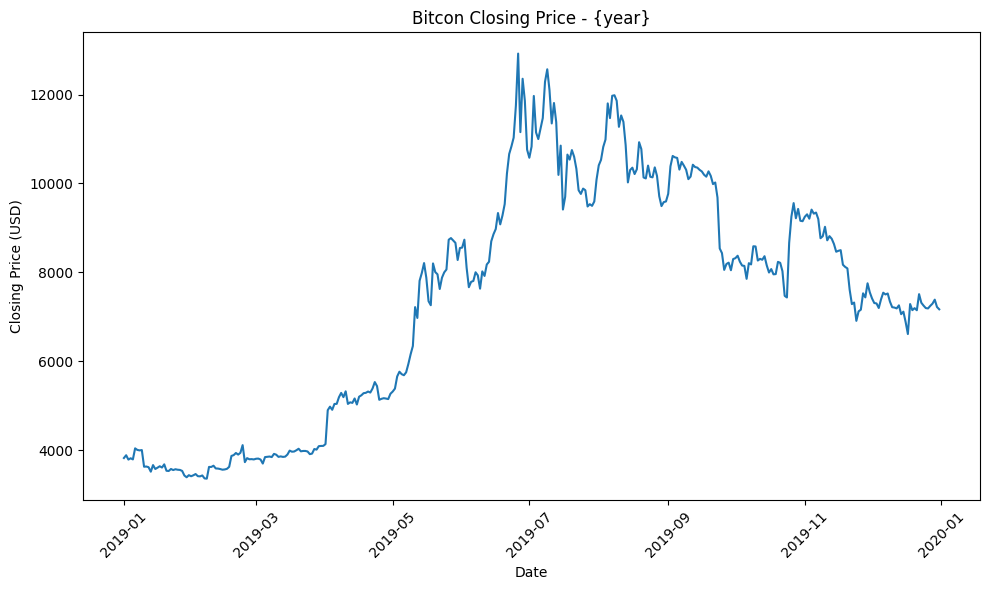

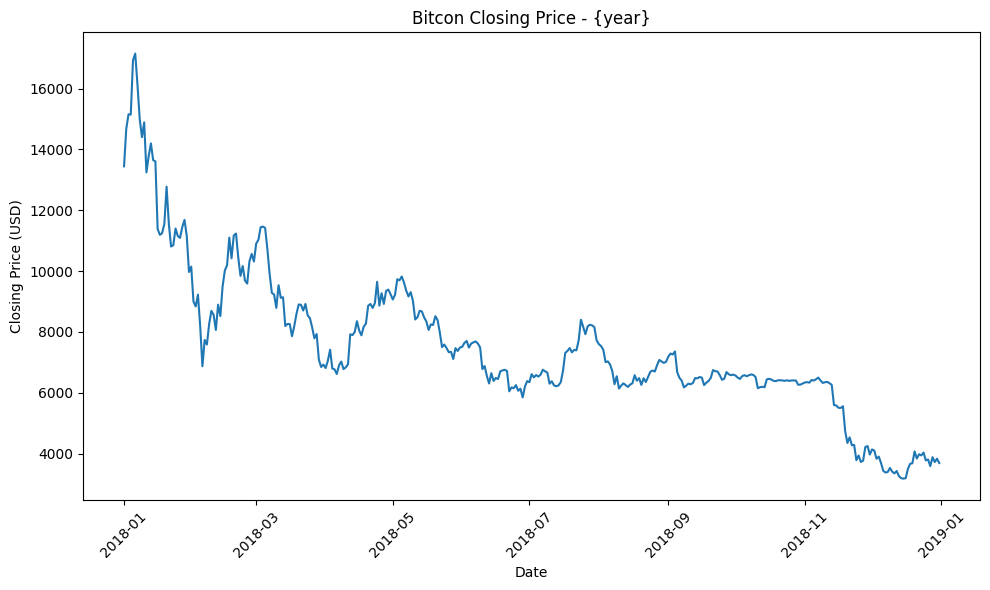

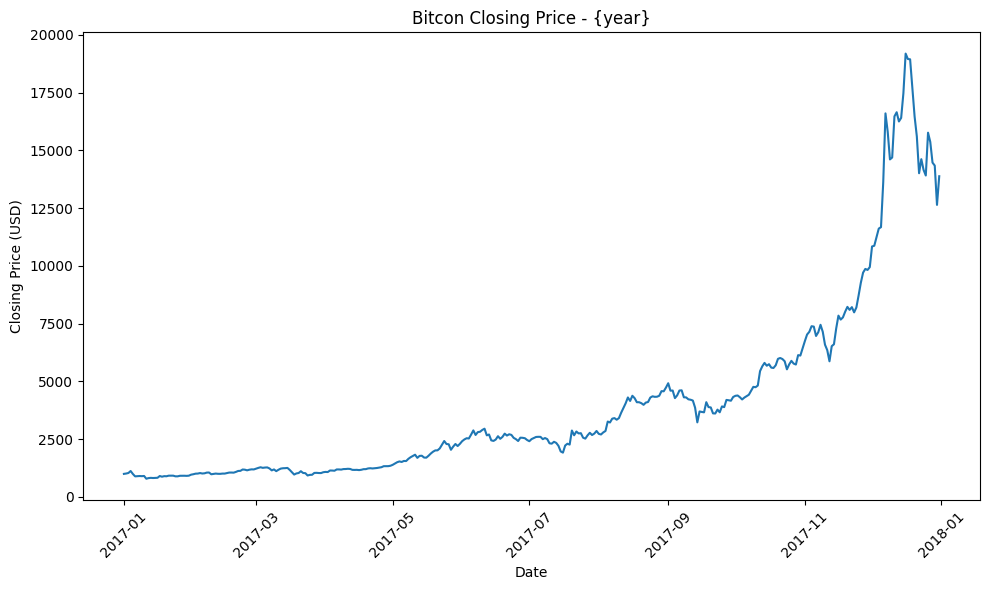

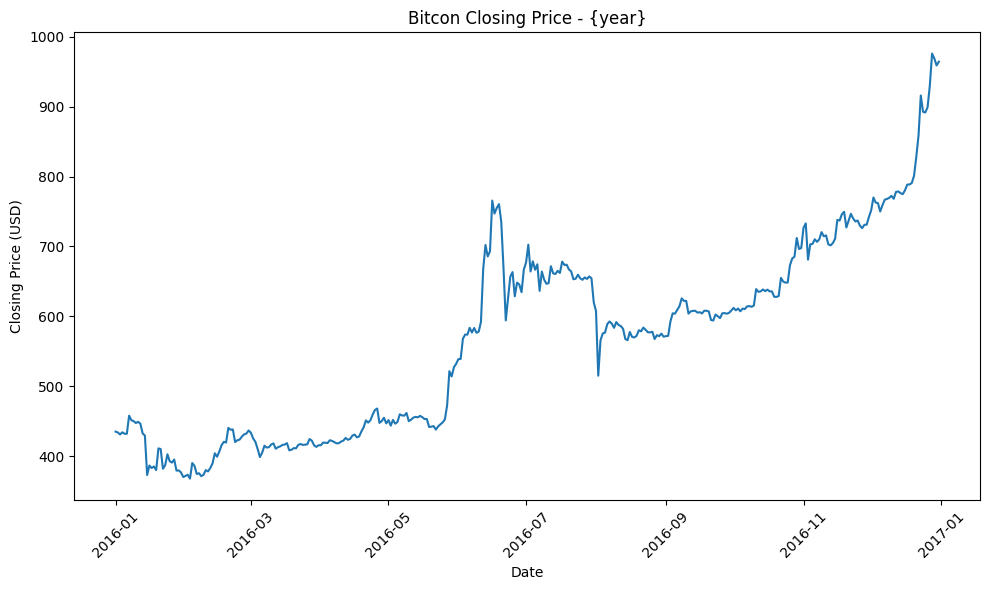

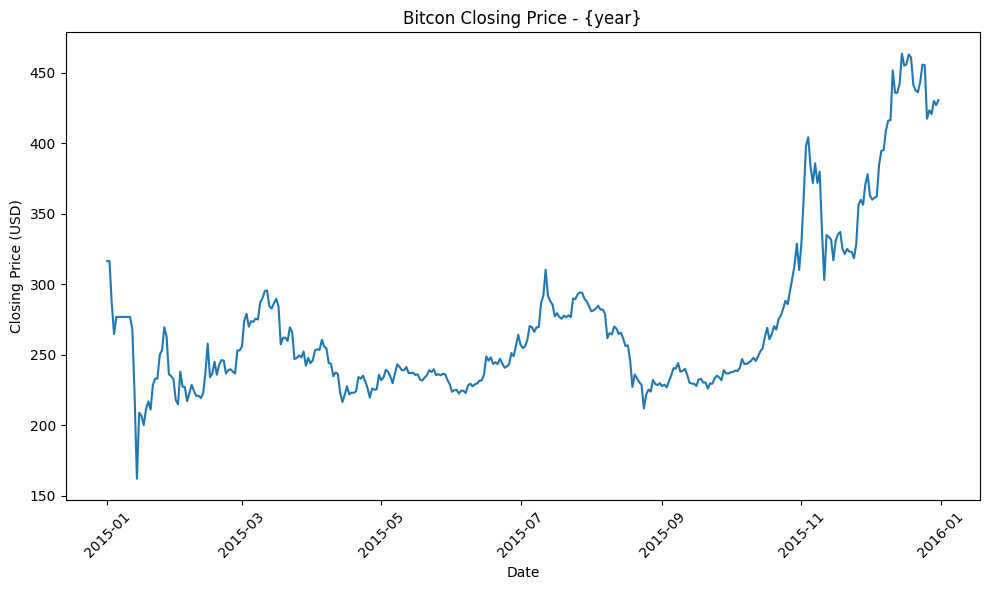

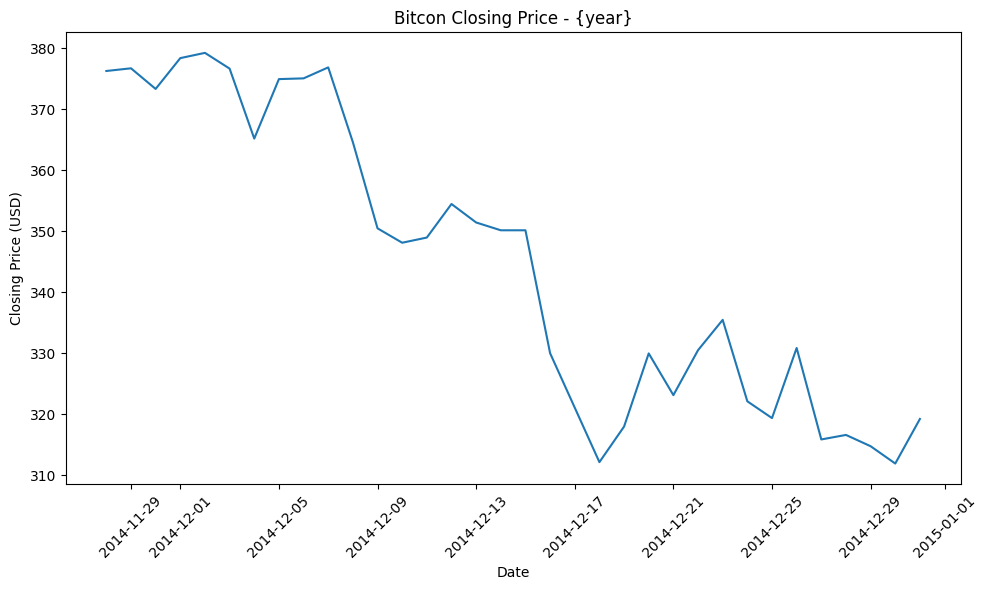

In [65]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

unique_years = df["year"].unique()
for year in unique_years:
    dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="D")
    year_month_day = pd.DataFrame({"date": dates})
    year_month_day["year"] = year_month_day["date"].dt.year
    year_month_day["month"] = year_month_day["date"].dt.month
    year_month_day["day"] = year_month_day["date"].dt.day

    merged_data = pd.merge(year_month_day, df, on=["year", "month", "day"], how="left")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data["date_x"], merged_data["close"])
    plt.title("Bitcon Closing Price - {year}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Tạo biểu đồ nến giá giao dịch từ năm 2019 - 2022

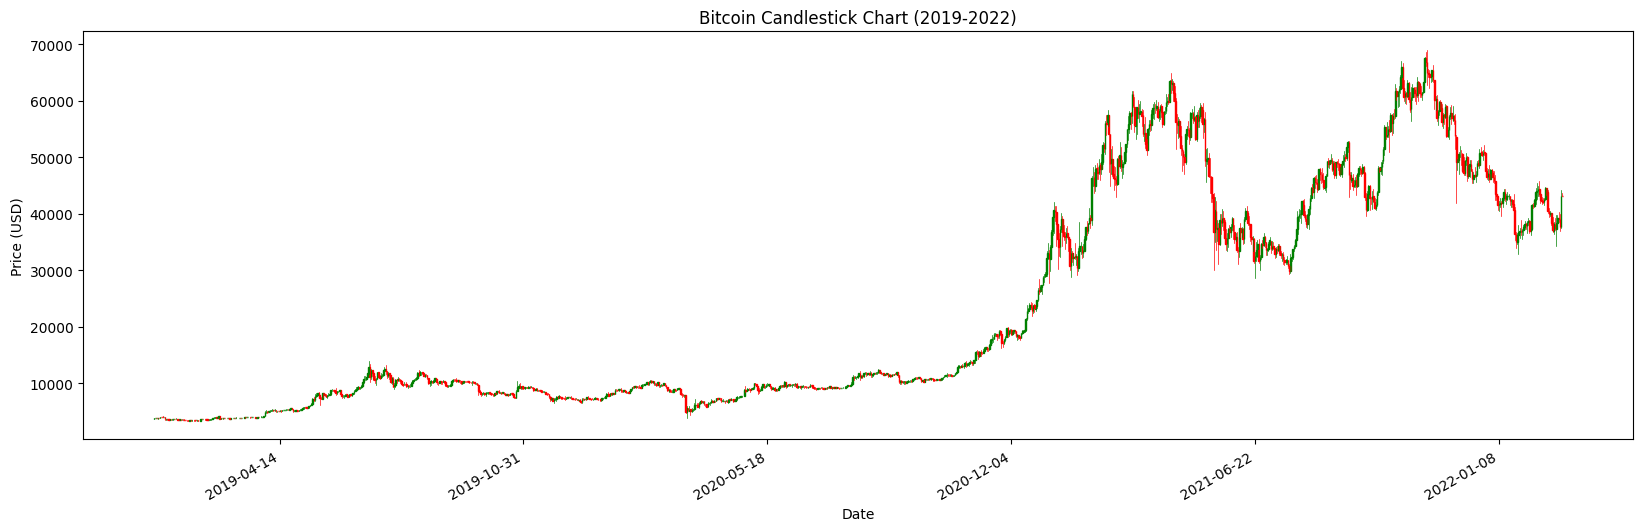

In [66]:
# Filter Data for 2019 - 2022
df_filtered = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")]

# Convert date to matplotlib format
df_filtered = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")].copy()
df_filtered["date"] = df_filtered["date"].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(
    ax,
    df_filtered[["date", "open", "high", "low", "close"]].values,
    width=0.6,
    colorup="g",
    colordown="r",
)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

plt.title("Bitcoin Candlestick Chart (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

### Tạo mô hình Linear Regression

In [67]:
def predict(X, w, b):
    return X.dot(w) + b


def gradient(y_hat, y, x):
    loss = y_hat - y  # Vector sai số (residual)
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / (2 * len(y))  # MSE (Loss)
    return (dw, db, cost)


def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[["open", "low", "high"]].values
y = df["close"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [77]:
X_train_scaled

array([[ 1.2830691 ,  1.27996044,  1.24910085],
       [-0.64104726, -0.6387622 , -0.64176901],
       [-0.12228726, -0.20837224, -0.13369182],
       ...,
       [-0.49568241, -0.48983903, -0.49667836],
       [-0.33513972, -0.32268656, -0.32060519],
       [-0.22374028, -0.25281463, -0.23622953]], shape=(1855, 3))

In [80]:
def linear_regression_vectorized(X, y, lr=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []
    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, lr, dw, db)
        losses.append(cost)

    return w, b, losses

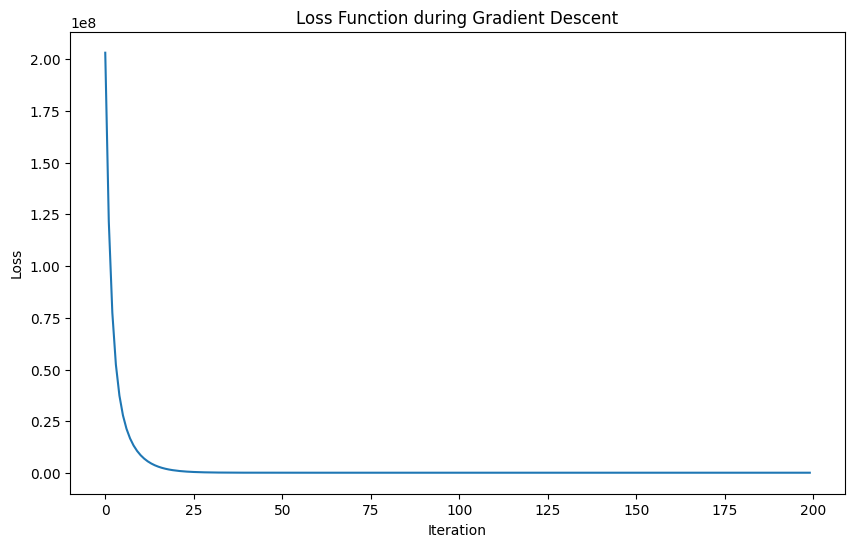

In [81]:
w, b, losses = linear_regression_vectorized(
    X_train_scaled, y_train, lr=0.1, num_iterations=200
)

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function during Gradient Descent")
plt.show()


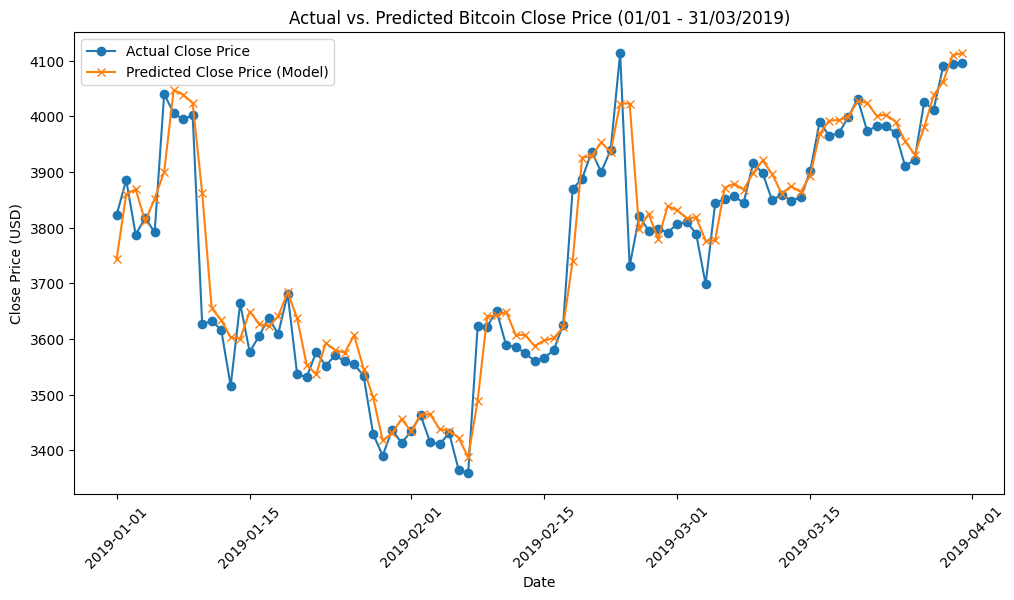

In [82]:
df_2019_Q1 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2019-03-31")].copy()

X_2019 = df_2019_Q1[["open", "low", "high"]].values
X_2019_scaled = scalar.transform(X_2019)  # dùng scalar đã fit trước đó
y_2019 = df_2019_Q1["close"].values

y_pred_2019 = predict(X_2019_scaled, w, b)
df_2019_Q1["predicted_close"] = y_pred_2019

plt.figure(figsize=(12, 6))
plt.plot(
    df_2019_Q1["date"], df_2019_Q1["close"], label="Actual Close Price", marker="o"
)
plt.plot(
    df_2019_Q1["date"],
    df_2019_Q1["predicted_close"],
    label="Predicted Close Price (Model)",
    marker="x",
)
plt.title("Actual vs. Predicted Bitcoin Close Price (01/01 - 31/03/2019)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()